<a href="https://colab.research.google.com/github/austin-leung/whos-that-pokemon/blob/master/whosThatPokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!kaggle datasets download -d mrgravelord/complete-pokemon-image-dataset -p /content/drive/My\ Drive/pkmnDataset

In [0]:
import os
!unzip -q /content/drive/My\ Drive/pkmnDataset/complete-pokemon-image-dataset.zip -d /content/drive/My\ Drive/pkmnImgs

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
from torch import nn
from torchvision import datasets, transforms

from torch import optim

import matplotlib.pyplot as plt

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

# transforms.Resize((42, 42)),
trainTransform  = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                    transforms.Resize((160, 160)),
                                    transforms.ToTensor(), 
                                    transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.ImageFolder('/content/drive/My Drive/pkmnImgsSubset', transform=trainTransform)


# We take 10 images per batch
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


torch.Size([64, 1, 160, 160])
{0: 'Abomasnow', 1: 'Abra', 2: 'Absol', 3: 'Accelgor', 4: 'Aegislash', 5: 'Aerodactyl', 6: 'Aggron', 7: 'Aipom', 8: 'Alakazam', 9: 'Alomomola'}
Abra


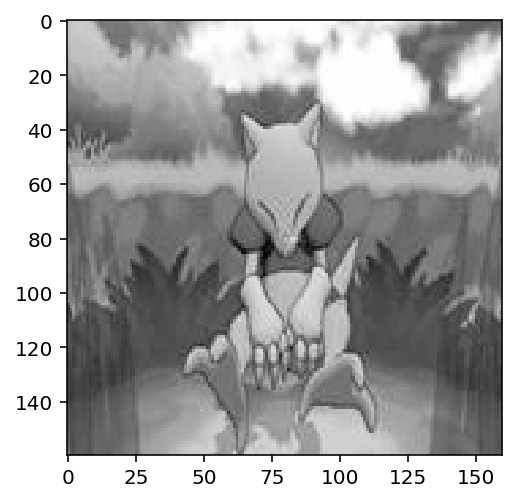

In [164]:



dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
# create a dictionary mapping labels to pokemon
pkmnIndDict = trainset.class_to_idx
pkmnIndDict = dict((v,k) for k,v in pkmnIndDict.items()) # flip keys and values
print(pkmnIndDict)
print(pkmnIndDict[labels[9].item()])
plt.imshow(images[9].numpy().squeeze(), cmap='Greys_r')

In [147]:
images, labels = next(iter(trainloader))
print(images.shape)
images.resize_(images.shape[0], 25600)
print(images.shape)


model = nn.Sequential(nn.Linear(25600, 128),
                      nn.Hardtanh(-1, 1),
                      nn.Linear(128, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 50
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        #print(labels)

        # TODO: Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()


        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


torch.Size([64, 1, 160, 160])
torch.Size([64, 25600])
Training loss: 2.2984140396118162
Training loss: 2.2001505851745606
Training loss: 2.02124605178833
Training loss: 1.9433104991912842
Training loss: 1.8735336303710937
Training loss: 1.7625416755676269
Training loss: 1.7198830604553224
Training loss: 1.6892159938812257
Training loss: 1.6329011917114258
Training loss: 1.5924225330352784
Training loss: 1.5385182857513429
Training loss: 1.484702181816101
Training loss: 1.450058364868164
Training loss: 1.4032652139663697
Training loss: 1.376981520652771
Training loss: 1.2973474979400634
Training loss: 1.257634425163269
Training loss: 1.2808030366897583
Training loss: 1.2047550439834596
Training loss: 1.2057693243026733
Training loss: 1.134247374534607
Training loss: 1.138954496383667
Training loss: 1.0755782961845397
Training loss: 1.0637113332748414
Training loss: 1.0651963233947754
Training loss: 1.0629995346069336
Training loss: 0.9831969380378723
Training loss: 1.0037343502044678
Tr

tensor(0.9209)
0: Abomasnow
1: Abra
2: Absol
3: Accelgor
4: Aegislash
5: Aerodactyl
6: Aggron
7: Aipom
8: Alakazam
9: Alomomola


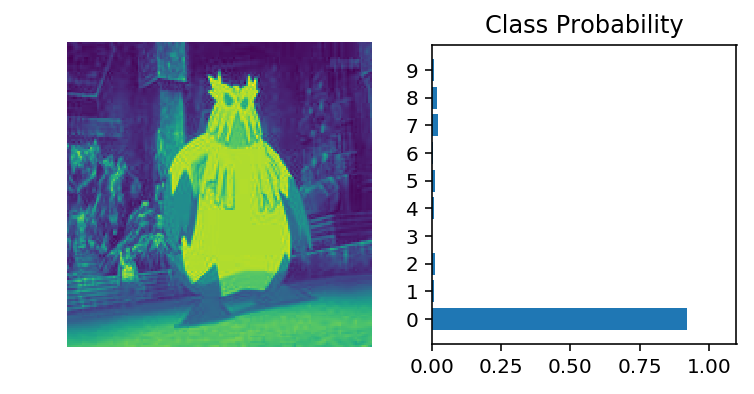

In [188]:
%matplotlib inline
import helper

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 160, 160).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

images, labels = next(iter(trainloader))

img = images[0].view(1, 25600)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
print(torch.max(ps))
for i in range(10):
  print(str(i) + ":", pkmnIndDict[i])
view_classify(img.view(1, 160, 160), ps)